# Trend Changes

In [1]:
import pandas as pd
from fbprophet import Prophet
%matplotlib inline

In [2]:
df = pd.read_csv('HospitalityEmployees.csv')

In [3]:
df.columns = ['ds','y']
df['ds'] = pd.to_datetime(df['ds'])

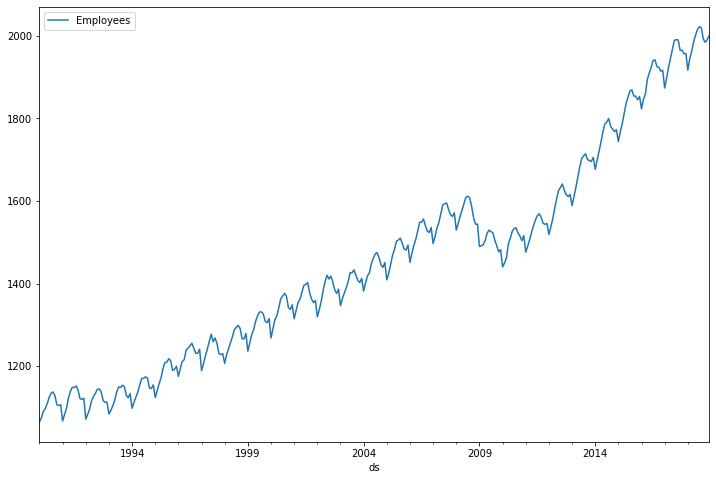

In [4]:
df.plot(x='ds',y='y',figsize=(12,8),label='Employees')

In [5]:
len(df)

348

In [6]:
len(df) - 12

336

In [7]:
train = df.iloc[:336]
test = df.iloc[336:]

In [8]:
m = Prophet()
m.fit(train)
future = m.make_future_dataframe(periods=12,freq='MS')
forecast = m.predict(future)

INFO:numexpr.utils:NumExpr defaulting to 4 threads.
INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


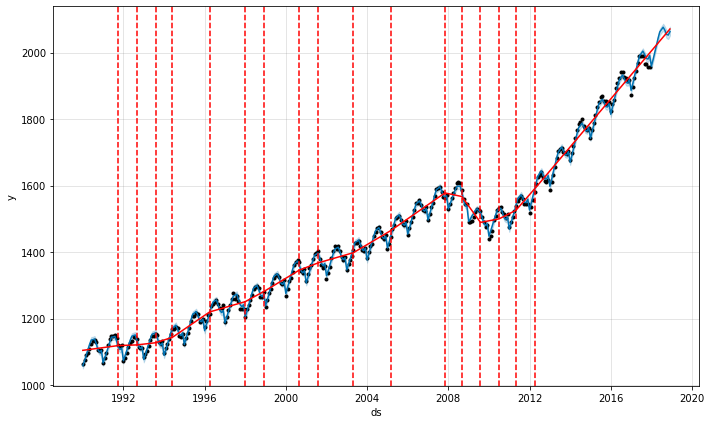

In [10]:
# this shows you the points where the trends started to change
from fbprophet.plot import add_changepoints_to_plot
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)